# Gamess job handling notes & dev
29/03/21

Version for testing updated pyGamess wrappers and file handling.

04/03/21

Testing methods for epsman.elecStructure.ESgamess

In [1]:
!hostname

jake


In [2]:
# Load dev scripts
from pathlib import Path
import sys
# modPath = r'/home/femtolab/python/epsman'
# modPath = r'D:\code\github'
# sys.path.append(modPath)
import epsman as em
# from epsman.elecStructure.ESclass import EShandler

In [3]:
em.epsJob

epsman.epsJob.epsJob

In [4]:
from epsman.elecStructure.gamess import ESgamess

Set name = None
Set smiles = [N-]=[N+]=O
Set molFile = None
Set job = None
Set sym = C1
Set atomList = None


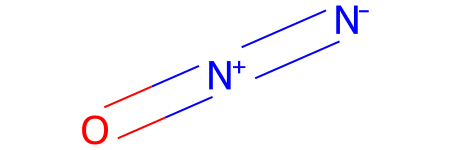

N      7.0      1.1203318954    0.1103129733    0.0000000000 
N      7.0     -0.0066842804   -0.3821096381    0.0000000000 
O      8.0     -1.1136476150   -0.8657704075    0.0000000000 



In [5]:
# Test from Smiles
testSmiles = ESgamess(smiles = '[N-]=[N+]=O')  # SMILES code for N2O, ugh... from https://pubchem.ncbi.nlm.nih.gov/compound/Nitrous-oxide#section=InChI
# testSmiles.mol

In [6]:
testSmiles.printCoords()

N      7.0      1.1203318954    0.1103129733    0.0000000000 
N      7.0     -0.0066842804   -0.3821096381    0.0000000000 
O      8.0     -1.1136476150   -0.8657704075    0.0000000000 



In [7]:
# len(testSmiles.mol.GetConformers())  # Check assigned conformers
# testSmiles.mol.GetConformer(0)

Set name = None
Set smiles = None
Set molFile = /home/paul/github/epsman/tests/N2O.SDF
Set job = None
Set sym = C1
Set atomList = None


RDKit WARNING: [16:42:41] Warning: molecule is tagged as 3D, but all Z coords are zero


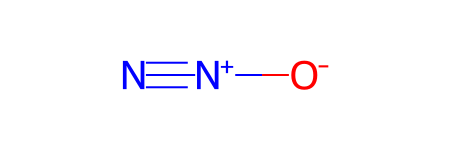

O      8.0      1.3063000000    0.0000000000    0.0000000000 
N      7.0     -0.1096000000    0.0000000000    0.0000000000 
N      7.0     -1.1967000000    0.0000000000    0.0000000000 



In [8]:
# Test download
# testDL = ESgamess(searchName = '[N-]=[N+]=O')  # SMILES code for N2O, ugh... from https://pubchem.ncbi.nlm.nih.gov/compound/Nitrous-oxide#section=InChI
# THE above did work, but now doesn't - odd. Version changes?

# testDL = ESgamess(searchName = 'N2O')  # This is OK

# From file
testDL = ESgamess(molFile = Path('/home/paul/github/epsman/tests/N2O.SDF'))

# testDL.mol

In [9]:
testDL.printCoords()

O      8.0      1.3063000000    0.0000000000    0.0000000000 
N      7.0     -0.1096000000    0.0000000000    0.0000000000 
N      7.0     -1.1967000000    0.0000000000    0.0000000000 



In [10]:
# from pathlib import Path

# Path(Path.cwd(), testDL.name).with_suffix('.' + fileType)

testDL.name

In [11]:
test.name

NameError: name 'test' is not defined

In [ ]:
test

In [ ]:
test.mol

In [ ]:
dir(test.mol)

## Test transforms

In [ ]:
testDL.printTable()

In [ ]:
testDL.plot2D()

In [ ]:
testDL.plot3D()

In [ ]:
testDL.printCoords()

In [ ]:
testDL.rotateFrame()

In [ ]:
testDL.printCoords()

In [ ]:
# Plot 2D doesn't really work after rotation - seems to assume (x,y) plane!
testDL.plot2D()

In [ ]:
testDL.plot3D()

In [ ]:
testDL.printTable()

## Test pyGamess wrapper

Notes...

- Currently set to add note & symmetry to input card, will default to None for these at the moment.
- Set inputs using setGamess().

In [ ]:
# testDL.initGamess(gamess_path = '/usr/local/gamess')  # Won't init without a path
testDL.initGamess(gamess_path = '/opt/gamess') # Using defaults

In [ ]:
# testDL.setGamess(note='N2O pyGamess wrapper testing', sym='C1')
testDL.setGamess(note='N2O pyGamess wrapper testing', sym='CNV 8')
# testDL.setGamess(note='N2O pyGamess wrapper testing', sym='CNV 8 \n')

In [ ]:
# With no file specified, output will be removed
# testDL.runGamess()

fileOut = '/tmp/testN2O2.out'
testDL.runGamess(fileOut = fileOut, runType = 'optimize')

In [ ]:
testDL.params

In [ ]:
# Test a different basis
# Set manually - as dict with options which appear on input card
testDL.params['basis'] = {'gbasis':'ACCD'}
testDL.params['contrl']['ISPHER']='1'  # For ACCD need this too! 
testDL.runGamess(fileOut = fileOut, runType = 'optimize')

In [ ]:
testDL.printGamess()

In [ ]:
# testDL.g.gamout

In [ ]:
# with open(testDL.g.gamout, 'r') as f:
#     print(f.read())

In [ ]:
with open(fileOut, 'r') as f:
    print(f.read())

In [ ]:
testDL.setGamess(job = 'job2', note='N2O pyGamess wrapper testing 2', sym='CNV 4')

In [ ]:
# Parameters
testDL.params

In [ ]:
# TODO - just push to g.options? Can then keep everything together.
testDL.g.options

In [ ]:
# testDL.gamessOptions = testDL.g.options

In [ ]:
testDL.params['test'] = {'something':1}

In [ ]:
testDL.gamessOptions

In [ ]:
testDL.g.options

In [ ]:
testDL.gCard['default']

pyGamess inits jobs to random names at run time, but defaults to blank name initially - may want to overwrite this later?

In [ ]:
testDL.g.jobname

## Testing bond length setting

In [ ]:
testDL.printTable()

In [ ]:
bonds = {'NO':{'a1':0, 'a2':1, 'l':5}, 'NN':{'a1':1, 'a2':2, 'l':5}}
# testDL.setBondLength(bonds = {'NO':{'a0':0, 'a1':1, 'l':5}})
testDL.setBondLength(bonds)

In [ ]:
testDL.setGamess()

Looks good.

## Multiple molecule job...?

Initally thought about wrapping pyGamess input cards, but easier just to spawn new instance - then no further wrapping required.

UPDATE 02/04/21: now implemented more coord routines in base class, develop this method here...

### Method test

In [ ]:
# New molecule
from copy import deepcopy
test2 = deepcopy(testDL)

In [ ]:
test2

In [ ]:
test2.printTable()

In [ ]:
bonds = {'NO':{'a1':0, 'a2':1, 'l':0.9}, 'NN':{'a1':1, 'a2':2, 'l':8}}
# testDL.setBondLength(bonds = {'NO':{'a0':0, 'a1':1, 'l':5}})
test2.setBondLength(bonds)

In [ ]:
testDL.printTable()

In [ ]:
testDL.g.write_file(testDL.mol)

### Class dev

In [78]:
from copy import deepcopy
import numpy as np

class ESmulti():
    from epsman.elecStructure.gamess import ESgamess
    
    # Init as per single ESgamess instance
    # Default to building job
    def __init__(self, buildES = True, **kwargs):
        
        self.ESbase = ESgamess(buildES = buildES, **kwargs)
        
        # Set jobs as a dict?
#         self.ESdict = {0: ESgamess(**kwargs)}
    
        # Additional setup
#         self.ESbase.rotateFrame()
    
    def setGamess(self, **kwargs):
        """Set ref case options in self.ESbase"""
        
        self.ESbase.setGamess(**kwargs)
    
    
    def runGeomScan(self, positionsList = None, positionsDict = None, bondDict = None,
                 use_rungms = False, fileBase = None):
        """
        Set geometry & run Gamess calculation for a set of atom positions or bond length settings.
        
        Notes 
        -----
        
        - This uses self.ESbase as the reference job, so set global options there first via self.setGamess()
        - Currently only supports one of positions or bonds.
        - NEED TO WORK OUT BEST METHOD HERE!!!
        
        """
        
        #*** Check inputs
        posFlag = False
        bondFlag = False
        
        if positionsDict is not None:
            posFlag = True
            geomDict = positionsDict
            
        if bondDict is not None:
            bondFlag = True
            geomDict = bondDict
            
        # TODO: combined case with itertools?
        
        # Set output
        # TODO: set proper temp file handling here
        if fileBase is None:
            fileBase = '/tmp/geomScan'
        
        
        #*** Loop over specified geometries
        self.geomScan = {}
        fileOut =[]
        Eout = []    
        
        for k, geom in geomDict.items():

            self.geomScan[k] = {}
            self.geomScan[k]['mol'] = deepcopy(self.ESbase)  # Copy ref case
            
            # Update job note & file
            self.geomScan[k]['mol'].params['extra']['job'] += f', geom scan item {k}'
            self.geomScan[k]['fileOut'] = f'{fileBase}_{k}.out'
            fileOut.append(self.geomScan[k]['fileOut'])

            if posFlag:
                self.geomScan[k]['mol'].setCoords(geom)
            
            if bondFlag:
                self.geomScan[k]['mol'].setBondLength({k:geom})
                
#             self.geomScan[k]['mol'].setGamess()
#  For use_rungms option need to set mol.g.rungms = mol.g.gamess_path + '/rungms'
#             self.geomScan[k]['mol'].runGamess(runType = 'energy', fileOut = fileOut[-1], use_rungms=True)
            self.geomScan[k]['mol'].runGamess(runType = 'energy', fileOut = fileOut[-1], use_rungms=use_rungms)
            Eout.append(self.geomScan[k]['mol'].mol.GetDoubleProp("total_energy")) # Log energy
            
        self.geomScan['summary'] = {'fileList':fileOut,
                                    'E':Eout,
                                    'geom':geomDict}

Set name = None
Set smiles = F[Xe]F
Set molFile = None
Set job = None
Set sym = C1
Set atomList = None


RDKit ERROR: [17:21:28] UFFTYPER: Unrecognized atom type: Xe5 (1)
RDKit ERROR: [17:21:28] UFFTYPER: Unrecognized atom type: Xe5 (1)


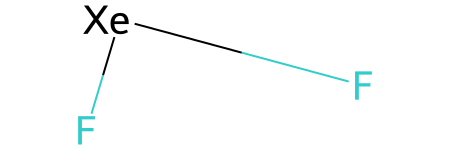

F      9.0      1.8016390562   -0.0729093450    0.0000000000 
Xe    54.0     -0.7290790339    0.6105503087   -0.0000000000 
F      9.0     -1.0725600223   -0.5376409637   -0.0000000000 

*** Running default Gamess job.
*** Set frame rotations, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,8.851536e-18,1.802584,-0.144557
1,1,Xe,54,3.173793e-17,-0.738879,-0.518320
2,2,F,9,-4.058946e-17,-1.063705,0.662876


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x dxkrjg -ddi 1 1 jake -scr /tmp/tmpo85ny4yn > /tmp/tmpo85ny4yn/dxkrjg.out


*** Init pyGamess job.
Default Gamess input card set (use self.params to modify options dictionary, self.setGamess() to test):

 $contrl scftyp=rhf runtyp=energy $end
 $basis gbasis=sto ngauss=3 $end
 $system mwords=30 $end
 $DATA
None
C1
F      9.0      0.0000000000    1.8025841286   -0.1445565484 
Xe    54.0      0.0000000000   -0.7388793080   -0.5183196608 
F      9.0     -0.0000000000   -1.0637048206    0.6628762093 
 $END

*** Gamess energy completed
E = -7360.6307285253997


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,8.851536e-18,1.802584,-0.144557
1,1,Xe,54,3.173793e-17,-0.738879,-0.518320
2,2,F,9,-4.058946e-17,-1.063705,0.662876


In [79]:
testMulti = ESmulti(smiles = 'F[Xe]F')

In [80]:
# Try fixing coords to previous equilibrium case, but leave as C1
coordsRef = {0:[0,0,1.937], 1:[0,0,0], 2:[0,0,-1.937]}
testMulti.ESbase.setCoords(coordsRef)

*** Set atom positions, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,0.0,0.0,1.937
1,1,Xe,54,0.0,0.0,0.000
2,2,F,9,0.0,0.0,-1.937


In [81]:
testMulti.ESbase.printGamessInput()

*** Gamess input card:
 $contrl scftyp=rhf runtyp=energy $end
 $basis gbasis=sto ngauss=3 $end
 $system mwords=30 $end
 $DATA
None
C1
F      9.0      0.0000000000    0.0000000000    1.9370000000 
Xe    54.0      0.0000000000    0.0000000000    0.0000000000 
F      9.0      0.0000000000    0.0000000000   -1.9370000000 
 $END



In [82]:
# Init gamess
testMulti.ESbase.initGamess(note = 'XeF2 testing')
testMulti.ESbase.setGamess(note='XeF2 testing')

INFO:pygamess.gamess:deleting tempdir /tmp/tmpo85ny4yn


*** Init pyGamess job.
Default Gamess input card set (use self.params to modify options dictionary, self.setGamess() to test):

 $contrl scftyp=rhf runtyp=energy $end
 $basis gbasis=sto ngauss=3 $end
 $system mwords=30 $end
 $DATA
None
C1
F      9.0      0.0000000000    0.0000000000    1.9370000000 
Xe    54.0      0.0000000000    0.0000000000    0.0000000000 
F      9.0      0.0000000000    0.0000000000   -1.9370000000 
 $END

*** Gamess input card:
 $contrl scftyp=rhf runtyp=energy $end
 $basis gbasis=sto ngauss=3 $end
 $system mwords=30 $end
 $DATA
XeF2 testing
C1
F      9.0      0.0000000000    0.0000000000    1.9370000000 
Xe    54.0      0.0000000000    0.0000000000    0.0000000000 
F      9.0      0.0000000000    0.0000000000   -1.9370000000 
 $END



In [83]:
# Try bond length scan...
geomDict = {str(v):{'a1':0,'a2':1,'l':v} for v in np.around(np.arange(1.5,3.0,0.1),3)}

testMulti.runGeomScan(bondDict = geomDict, fileBase = '/tmp/XeF2_geomScan_test')

*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,0.0,0.0,1.937
1,1,Xe,54,0.0,0.0,0.437
2,2,F,9,0.0,0.0,-1.500


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x jsetrp -ddi 1 1 jake -scr /tmp/tmp25uabk78 > /tmp/tmp25uabk78/jsetrp.out


*** Gamess energy completed
E = -7361.5408665780997
*** Gamess output file moved to /tmp/XeF2_geomScan_test_1.5.out
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,0.0,0.0,1.937
1,1,Xe,54,0.0,0.0,0.337
2,2,F,9,0.0,0.0,-1.600


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x whjfek -ddi 1 1 jake -scr /tmp/tmp25uabk78 > /tmp/tmp25uabk78/whjfek.out


*** Gamess energy completed
E = -7361.6529181687001
*** Gamess output file moved to /tmp/XeF2_geomScan_test_1.6.out
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,0.0,0.0,1.937
1,1,Xe,54,0.0,0.0,0.237
2,2,F,9,0.0,0.0,-1.700


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x ghmwck -ddi 1 1 jake -scr /tmp/tmp25uabk78 > /tmp/tmp25uabk78/ghmwck.out


*** Gamess energy completed
E = -7361.7250521807
*** Gamess output file moved to /tmp/XeF2_geomScan_test_1.7.out
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,0.0,0.0,1.937
1,1,Xe,54,0.0,0.0,0.137
2,2,F,9,0.0,0.0,-1.800


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x akwhot -ddi 1 1 jake -scr /tmp/tmp25uabk78 > /tmp/tmp25uabk78/akwhot.out


*** Gamess energy completed
E = -7361.7693883794
*** Gamess output file moved to /tmp/XeF2_geomScan_test_1.8.out
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,0.0,0.0,1.937
1,1,Xe,54,0.0,0.0,0.037
2,2,F,9,0.0,0.0,-1.900


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x bsouno -ddi 1 1 jake -scr /tmp/tmp25uabk78 > /tmp/tmp25uabk78/bsouno.out


*** Gamess energy completed
E = -7361.7940386864002
*** Gamess output file moved to /tmp/XeF2_geomScan_test_1.9.out
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,0.0,0.0,1.937
1,1,Xe,54,0.0,0.0,-0.063
2,2,F,9,0.0,0.0,-2.000


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x kgobgg -ddi 1 1 jake -scr /tmp/tmp25uabk78 > /tmp/tmp25uabk78/kgobgg.out


*** Gamess energy completed
E = -7361.8047937900001
*** Gamess output file moved to /tmp/XeF2_geomScan_test_2.0.out
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,0.0,0.0,1.937
1,1,Xe,54,0.0,0.0,-0.163
2,2,F,9,0.0,0.0,-2.100


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x oczrim -ddi 1 1 jake -scr /tmp/tmp25uabk78 > /tmp/tmp25uabk78/oczrim.out


*** Gamess energy completed
E = -7361.8058951385001
*** Gamess output file moved to /tmp/XeF2_geomScan_test_2.1.out
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,0.0,0.0,1.937
1,1,Xe,54,0.0,0.0,-0.263
2,2,F,9,0.0,0.0,-2.200


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x bnpfsn -ddi 1 1 jake -scr /tmp/tmp25uabk78 > /tmp/tmp25uabk78/bnpfsn.out


*** Gamess energy completed
E = -7361.8004834147996
*** Gamess output file moved to /tmp/XeF2_geomScan_test_2.2.out
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,0.0,0.0,1.937
1,1,Xe,54,0.0,0.0,-0.363
2,2,F,9,0.0,0.0,-2.300


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x xocybd -ddi 1 1 jake -scr /tmp/tmp25uabk78 > /tmp/tmp25uabk78/xocybd.out


*** Gamess energy completed
E = -7361.7908898795004
*** Gamess output file moved to /tmp/XeF2_geomScan_test_2.3.out
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,0.0,0.0,1.937
1,1,Xe,54,0.0,0.0,-0.463
2,2,F,9,0.0,0.0,-2.400


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x wvgwsv -ddi 1 1 jake -scr /tmp/tmp25uabk78 > /tmp/tmp25uabk78/wvgwsv.out


*** Gamess energy completed
E = -7361.7788379256999
*** Gamess output file moved to /tmp/XeF2_geomScan_test_2.4.out
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,0.0,0.0,1.937
1,1,Xe,54,0.0,0.0,-0.563
2,2,F,9,0.0,0.0,-2.500


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x muctvx -ddi 1 1 jake -scr /tmp/tmp25uabk78 > /tmp/tmp25uabk78/muctvx.out


*** Gamess energy completed
E = -7361.5806256386004
*** Gamess output file moved to /tmp/XeF2_geomScan_test_2.5.out
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,0.0,0.0,1.937
1,1,Xe,54,0.0,0.0,-0.663
2,2,F,9,0.0,0.0,-2.600


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x kczrrh -ddi 1 1 jake -scr /tmp/tmp25uabk78 > /tmp/tmp25uabk78/kczrrh.out


*** Gamess energy completed
E = -7361.7520616375996
*** Gamess output file moved to /tmp/XeF2_geomScan_test_2.6.out
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,0.0,0.0,1.937
1,1,Xe,54,0.0,0.0,-0.763
2,2,F,9,0.0,0.0,-2.700


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x uvxlqx -ddi 1 1 jake -scr /tmp/tmp25uabk78 > /tmp/tmp25uabk78/uvxlqx.out


*** Gamess energy completed
E = -7361.7388911193002
*** Gamess output file moved to /tmp/XeF2_geomScan_test_2.7.out
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,0.0,0.0,1.937
1,1,Xe,54,0.0,0.0,-0.863
2,2,F,9,0.0,0.0,-2.800


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x krcgbv -ddi 1 1 jake -scr /tmp/tmp25uabk78 > /tmp/tmp25uabk78/krcgbv.out


*** Gamess energy completed
E = -7361.7265075589003
*** Gamess output file moved to /tmp/XeF2_geomScan_test_2.8.out
*** Set bonds, new coord table:


,Ind,Species,Atomic Num.,x,y,z
0,0,F,9,0.0,0.0,1.937
1,1,Xe,54,0.0,0.0,-0.963
2,2,F,9,0.0,0.0,-2.900


INFO:pygamess.gamess:Executeing py_rungms with command /opt/gamess/ddikick.x /opt/gamess/gamess.00.x qagbbm -ddi 1 1 jake -scr /tmp/tmp25uabk78 > /tmp/tmp25uabk78/qagbbm.out


*** Gamess energy completed
E = -7361.7151707970997
*** Gamess output file moved to /tmp/XeF2_geomScan_test_2.9.out


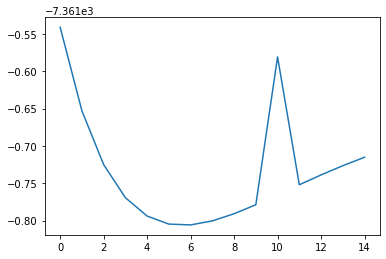

In [84]:
import matplotlib.pyplot as plt

# plt.plot(bondLengths, Eout)
plt.plot(testMulti.geomScan['summary']['E'])

In [70]:
testMulti.['mol']

KeyError: 'mol'

In [48]:
geomDict

{'1.5': {'a1': 0, 'a2': 1, 'l': 1.5},
 '1.6': {'a1': 0, 'a2': 1, 'l': 1.6},
 '1.7': {'a1': 0, 'a2': 1, 'l': 1.7},
 '1.8': {'a1': 0, 'a2': 1, 'l': 1.8},
 '1.9': {'a1': 0, 'a2': 1, 'l': 1.9},
 '2.0': {'a1': 0, 'a2': 1, 'l': 2.0},
 '2.1': {'a1': 0, 'a2': 1, 'l': 2.1},
 '2.2': {'a1': 0, 'a2': 1, 'l': 2.2},
 '2.3': {'a1': 0, 'a2': 1, 'l': 2.3},
 '2.4': {'a1': 0, 'a2': 1, 'l': 2.4},
 '2.5': {'a1': 0, 'a2': 1, 'l': 2.5},
 '2.6': {'a1': 0, 'a2': 1, 'l': 2.6},
 '2.7': {'a1': 0, 'a2': 1, 'l': 2.7},
 '2.8': {'a1': 0, 'a2': 1, 'l': 2.8},
 '2.9': {'a1': 0, 'a2': 1, 'l': 2.9}}

## SCRATCH

In [ ]:
coordsRef = {0:[0,0,1.937], 1:[0,0,0], 2:[0,0,-1.937]}
bondsRef = {'NO':{'a1':0, 'a2':1, 'l':5}, 'NN':{'a1':1, 'a2':2, 'l':5}}

In [ ]:
coordsList = {'x':[0], 'y':[0], 'z':[1,2,3,4]}

In [ ]:
import numpy as np
{v:{'z':v} for v in np.arange(1,2,0.1)}

In [ ]:
# Test generating list of bond lengths
geomDict = {v:{'a1':0,'a2':1,'l':v} for v in np.around(np.arange(1,2,0.1),2)}

for k, item in geomDict.items():
    print(item)

In [ ]:
bList

In [ ]:
test = 'somthing'

test += ' yep'

In [ ]:
test